<a href="https://colab.research.google.com/github/madsondeluna/aula_dinamica_molecular/blob/main/MD_GMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação do GROMACS

In [ ]:
# Atualizar o gerenciador de pacotes e instalar as dependências de compilação
!apt-get update
!apt-get install -y build-essential cmake libfftw3-dev

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,918 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,773 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,575 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,161 kB]
Hit:13 https://ppa.launchpadcontent.net/g

In [ ]:
# Fazer o download do código-fonte
!wget https://ftp.gromacs.org/gromacs/gromacs-2024.tar.gz

# Extrair os arquivos
!tar xfz gromacs-2024.tar.gz

--2025-08-06 18:25:31--  https://ftp.gromacs.org/gromacs/gromacs-2024.tar.gz
Resolving ftp.gromacs.org (ftp.gromacs.org)... 130.237.11.165, 2001:6b0:1:1191:216:3eff:fec7:6e30
Connecting to ftp.gromacs.org (ftp.gromacs.org)|130.237.11.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42455653 (40M) [application/x-gzip]
Saving to: ‘gromacs-2024.tar.gz’

gromacs-2024.tar.gz 100%[===================>]  40.49M  19.4MB/s    in 2.1s    

2025-08-06 18:25:35 (19.4 MB/s) - ‘gromacs-2024.tar.gz’ saved [42455653/42455653]



In [ ]:
# Mover para o diretório do código-fonte e criar um diretório de build
%cd gromacs-2024
!mkdir build
%cd build

# Executar o cmake com as flags para GPU
# -DGMX_BUILD_OWN_FFTW=ON: Compila uma versão interna do FFTW para evitar conflitos.
# -DREGRESSIONTEST_DOWNLOAD=ON: Baixa os testes de regressão.
# -DGMX_GPU=CUDA: Habilita o suporte para GPU usando CUDA (padrão no Colab).
# -DCMAKE_INSTALL_PREFIX=/usr/local/gromacs: Define o diretório de instalação.
!cmake .. -DGMX_BUILD_OWN_FFTW=ON -DREGRESSIONTEST_DOWNLOAD=ON -DGMX_GPU=CUDA -DCMAKE_INSTALL_PREFIX=/usr/local/gromacs

/content/gromacs-2024
/content/gromacs-2024/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Python3: /usr/local/bin/python (found suitable version "3.11.13", minimum required is "3.7") found components: Interpreter Development Development.Module Development.Embed
-- Selected GPU FFT library - cuFFT
-- Found OpenMP_C: -fopenmp (found version "4.5")
-- Found OpenMP_CXX: -fopenmp (found version "4.5")
-- Found OpenMP: TRUE (found version "4.5")
-- Performing Test CFLAGS_WARN_NO_MISSING_FIELD_INITIALIZERS
-- Performing Test CF

In [ ]:
# Compilar o GROMACS. A flag -j especifica o número de threads (cores) a serem usados.
!make -j 4

# (Opcional, mas recomendado) Executar os testes para verificar a compilação
!make check

# Instalar o GROMACS no diretório definido pelo CMAKE_INSTALL_PREFIX
!make install

A saída de streaming foi truncada nas últimas 5000 linhas.
checking for memory.h... yes
[  4%] Building CXX object src/gromacs/CMakeFiles/thread_mpi.dir/__/external/thread_mpi/src/topology.cpp.o
checking for strings.h... yes
checking for inttypes.h... [  6%] Building CXX object src/gromacs/CMakeFiles/thread_mpi.dir/__/external/thread_mpi/src/list.cpp.o
yes
checking for stdint.h... [  6%] Building CXX object src/gromacs/CMakeFiles/thread_mpi.dir/__/external/thread_mpi/src/type.cpp.o
yes
checking for unistd.h... yes
checking for dlfcn.h... yes
checking for objdir... .libs
checking if gcc supports -fno-rtti -fno-exceptions... no
checking for gcc option to produce PIC... -fPIC -DPIC
checking if gcc PIC flag -fPIC -DPIC works... yes
checking if gcc static flag -static works... yes
checking if gcc supports -c -o file.o... yes
checking if gcc supports -c -o file.o... (cached) yes
checking whether the gcc linker (/usr/bin/ld -m elf_x86_64) supports shared libraries... yes
checking dynamic link

In [ ]:
# Adicionar o caminho do GROMACS ao ambiente
# Este comando precisa ser executado em cada nova sessão do Colab
import os
os.environ['PATH'] += ":/usr/local/gromacs/bin"

In [ ]:
# Verificar a versão do GROMACS
# O output deve indicar a versão e o suporte a "CUDA"
!gmx --version

                          :-) GROMACS - gmx, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx --version

GROMACS version:     2024
Precision:           mixed
Memory model:        64 bit
MPI library:         thread_mpi
OpenMP support:      enabled (GMX_OPENMP_MAX_THREADS = 128)
GPU support:         CUDA
NBNxM GPU setup:     super-cluster 2x2x2 / cluster 8
SIMD instructions:   AVX2_256
CPU FFT library:     fftw-3.3.8-sse2-avx-avx2-avx2_128
GPU FFT library:     cuFFT
Multi-GPU FFT:       none
RDTSCP usage:        enabled
TNG support:         enabled
Hwloc support:       disabled
Tracing support:     disabled
C compiler:          /usr/bin/cc GNU 11.4.0
C compiler flags:    -fexcess-precision=fast -funroll-all-loops -mavx2 -mfma -Wno-missing-field-initializers -O3 -DNDEBUG
C++ compiler:        /usr/bin/c++ GNU 11.4.0
C++ compiler flags:  -fexcess-precision=fast -funroll-all-loops -mavx2 -mfma -W

# Preparo da Simulação

In [ ]:
# Importa o módulo 'os' para interagir com o sistema de arquivos
import os
import glob

# Lista de extensões de arquivos a serem removidos
# Inclui inputs, outputs e arquivos intermediários do GROMACS
file_patterns = [
    '*.pdb', '*.mdp', '*.gro', '*.top', '*.tpr', '*.xtc',
    '*.log', '*.edr', '*.cpt', '*.trr', '*.xvg'
]

print("Removendo arquivos da simulação anterior...")

# Itera sobre os padrões e remove os arquivos correspondentes
for pattern in file_patterns:
    # glob.glob encontra todos os arquivos que correspondem ao padrão
    for f in glob.glob(pattern):
        try:
            os.remove(f)
            print(f"  - Removido: {f}")
        except OSError as e:
            print(f"Erro ao remover {f}: {e}")

# Comando separado para remover os arquivos de backup do GROMACS (ex: #topol.top.1#)
# Usamos '!' para executar um comando shell diretamente
!rm -f \#*

print("\nLimpeza concluída! O diretório está pronto para uma nova simulação. 🗑️")

# (Opcional) Lista os arquivos restantes para confirmar a limpeza
print("\nArquivos restantes no diretório:")
!ls

Removendo arquivos da simulação anterior...
  - Removido: model.pdb
  - Removido: nvt.mdp
  - Removido: minim.mdp
  - Removido: npt.mdp
  - Removido: mdout.mdp
  - Removido: md.mdp
  - Removido: ions.mdp
  - Removido: model_newbox.gro
  - Removido: model_processed.gro
  - Removido: model_solv.gro
  - Removido: em.gro
  - Removido: nvt.gro
  - Removido: model_solv_ions.gro
  - Removido: topol.top
  - Removido: ions.tpr
  - Removido: em.tpr
  - Removido: nvt.tpr
  - Removido: nvt.xtc
  - Removido: nvt.log
  - Removido: em.log
  - Removido: em.edr
  - Removido: nvt.edr
  - Removido: nvt.cpt
  - Removido: em.trr

Limpeza concluída! O diretório está pronto para uma nova simulação. 🗑️

Arquivos restantes no diretório:
'analysis (1).bash'	  'gmx_run (2).bash'
'analysis (2).bash'	  'gmx_run (3).bash'
'analysis (3).bash'	   gmx_run.bash
 analysis.bash		   install_manifest.txt
 a.out			   lib
 api			   Makefile
 bin			   muparser.pc
 cmake			   muparser-targets.cmake
 CMakeCache.txt		   posre.it

> Os arquivos para este tutorial podem ser baixados em: https://drive.google.com/drive/folders/1YwZ8mfGRjexE_2c2UjatHvi-CVYpM8uC?usp=drive_link


In [ ]:
# Fazer upload dos arquivos necessários
# Antes de começar, execute esta célula para fazer o upload do seu arquivo PDB e dos arquivos de parâmetros (.mdp) para o ambiente do Colab...
# Arquivos necessários (fazer upload aqui): model.pdb (sua estrutura de proteína), ions.mdp, minim.mdp, nvt.mdp, npt.mdp, md.mdp

from google.colab import files
uploaded = files.upload()

print(f"Arquivos carregados: {list(uploaded.keys())}")

Saving model.pdb to model.pdb
Saving analysis.bash to analysis (4).bash
Saving gmx_run.bash to gmx_run (4).bash
Saving md.mdp to md.mdp
Saving mdout.mdp to mdout.mdp
Saving ions.mdp to ions.mdp
Saving minim.mdp to minim.mdp
Saving npt.mdp to npt.mdp
Saving nvt.mdp to nvt.mdp
Arquivos carregados: ['model.pdb', 'analysis (4).bash', 'gmx_run (4).bash', 'md.mdp', 'mdout.mdp', 'ions.mdp', 'minim.mdp', 'npt.mdp', 'nvt.mdp']


In [ ]:
### 1. Preparação da Topologia da Proteína

# O comando `gmx pdb2gmx` lê o arquivo PDB, gera a topologia e um arquivo de coordenadas.
# As seleções para o campo de força e o modelo de água são fornecidas via 'echo'.
# Neste exemplo, '15' corresponde a CHARMM36 e '1' a TIP3P.
# Verifique os números correspondentes na saída do seu comando se estiver usando uma versão diferente.
!echo -e "15\n1" | gmx pdb2gmx -f model.pdb -o model_processed.gro -water spce -ignh

                      :-) GROMACS - gmx pdb2gmx, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx pdb2gmx -f model.pdb -o model_processed.gro -water spce -ignh

Select the Force Field:

From '/usr/local/gromacs/share/gromacs/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS force field (Garcia & Sanbonmatsu, PNAS 99, 2782-2787, 2002)

 8: CHARMM27 all-atom force field (CHARM22 plus CMAP for proteins)

 9: GROMOS96

In [ ]:
### 2. Definição da Caixa e Solvatação

# Define uma caixa de simulação cúbica, posicionando a proteína no centro,
# com uma distância mínima de 1.0 nm até a borda da caixa.
!gmx editconf -f model_processed.gro -o model_newbox.gro -c -d 1.0 -bt cubic

# Preenche a caixa com moléculas de água (solvatação).
# O arquivo de topologia é atualizado para incluir as moléculas de água adicionadas.
!gmx solvate -cp model_newbox.gro -cs spc216.gro -o model_solv.gro -p topol.top

                      :-) GROMACS - gmx editconf, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx editconf -f model_processed.gro -o model_newbox.gro -c -d 1.0 -bt cubic

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 2194 atoms
Volume: 123.376 nm^3, corresponds to roughly 55500 electrons
No velocities found
    system size :  4.196  4.268  3.454 (nm)
    diameter    :  5.339               (nm)
    center      :  2.772  2.507  0.003 (nm)
    box vectors :  5.906  6.845  3.052 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 123.38               (nm^3)
    shift       :  0.898  1.162  3.667 (nm)
new center      :  3.670  3.670  3.670 (nm)
new box vectors :  7.339  7.339  7.339 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  : 395.33               (nm^3)

GROMACS reminds you: "AH ....Satisfaction

In [ ]:
### 3. Adição de Íons

# Cria um arquivo de execução binário (.tpr) para a adição de íons,
# usando os parâmetros definidos em 'ions.mdp'.
!gmx grompp -f ions.mdp -c model_solv.gro -p topol.top -o ions.tpr -maxwarn 5

# Adiciona íons para neutralizar a carga do sistema e atingir uma concentração de 0.15 M.
# O grupo 'SOL' (geralmente o grupo 13) é selecionado para ser substituído pelos íons.
!echo "13" | gmx genion -s ions.tpr -o model_solv_ions.gro -p topol.top -neutral -conc 0.15 -pname NA -nname CL

                       :-) GROMACS - gmx grompp, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx grompp -f ions.mdp -c model_solv.gro -p topol.top -o ions.tpr -maxwarn 5

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -1346372929

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 2 bonded neighbours molecule type 'SOL'

NOTE 1 [file topol.top, line 18410]:
  System has non-zero total charge: 8.000000
  Total charge should normally be an integer. See
  https://manual.gromacs.org/current/user-guide/floating-point.html
  for discussion on how close it should be to an integer.




WARNING 1 [file topol.top, line 18410]:
  You are using E

In [ ]:
### 4. Minimização de Energia

# Prepara o sistema para a minimização de energia com os parâmetros de 'minim.mdp'.
!gmx grompp -f minim.mdp -c model_solv_ions.gro -p topol.top -o em.tpr -maxwarn 5

# Executa a minimização de energia para relaxar a estrutura.
!gmx mdrun -v -deffnm em -s em.tpr

                       :-) GROMACS - gmx grompp, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx grompp -f minim.mdp -c model_solv_ions.gro -p topol.top -o em.tpr -maxwarn 5

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -6425230

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   129    Protein residues
There are: 12064      Water residues
There are:    80        Ion residues
Analysing Protein...
Number of degrees of freedom in T-Coupling group rest is 78501

In [ ]:
### 5. Equilibração NVT (Temperatura Constante)

# Prepara o sistema para a equilibração no ensemble NVT (Volume e Temperatura constantes).
# Restrições de posição são aplicadas à proteína (usando -r em.gro).
!gmx grompp -f nvt.mdp -c em.gro -p topol.top -o nvt.tpr -r em.gro -maxwarn 5

# Executa a equilibração NVT.
!gmx mdrun -deffnm nvt -v -s nvt.tpr

                       :-) GROMACS - gmx grompp, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx grompp -f nvt.mdp -c em.gro -p topol.top -o nvt.tpr -r em.gro -maxwarn 5

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -2703393

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

turning all bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning all bonds into constraints...

NOTE 1 [file unknown]:
  You a

In [ ]:
### 6. Equilibração NPT (Pressão Constante)

# Prepara o sistema para a equilibração no ensemble NPT (Pressão e Temperatura constantes).
# O estado final da etapa NVT (-c nvt.gro, -t nvt.cpt) é usado como ponto de partida.
!gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -p topol.top -o npt.tpr -r em.gro -maxwarn 5

# Executa a equilibração NPT para estabilizar a densidade do sistema.
!gmx mdrun -deffnm npt -v -s npt.tpr

                       :-) GROMACS - gmx grompp, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -p topol.top -o npt.tpr -r em.gro -maxwarn 5

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -855638023

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

turning all bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning all bonds into constraints...

NOTE 1 [file unk

In [ ]:
### 7. Simulação Produtiva (MD)

# Prepara o sistema para a simulação de produção final, sem restrições.
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr -maxwarn 5

# Executa a simulação produtiva. Esta é a etapa mais longa e que consome mais recursos.
# Para execuções no Colab, considere usar a aceleração por GPU se o GROMACS foi compilado com suporte a CUDA.
!gmx mdrun -deffnm md_0_1 -v

                       :-) GROMACS - gmx grompp, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr -maxwarn 5

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -554926145

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning all bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

turning all bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning all bonds into constraints...

NOTE 1 [file unknown]:
  You are using constraints on all bo

# Análises

In [ ]:
### Pós-processamento e Análise de Resultados
# Nota: Os gráficos podem ser visualizados diretamente no Colab após a geração dos arquivos .xvg.
# Você pode usar bibliotecas como pandas e matplotlib para carregar e plotar os dados.

#### 1.1 Cálculo do RMSF (Root-Mean-Square Fluctuation)
# Calcula a flutuação por resíduo. '3' é selecionado para o grupo 'C-alpha'.
!echo "3" | gmx rmsf -s md_0_1.tpr -f md_0_1.xtc -o rmsf.xvg -res

#### 1.2 Cálculo do RMSD (Root-Mean-Square Deviation)
# Calcula o desvio da estrutura ao longo do tempo. '4' é selecionado para 'Backbone' tanto para o ajuste quanto para o cálculo.
!echo "4 4" | gmx rms -s md_0_1.tpr -f md_0_1.xtc -o rmsd.xvg -tu ns

#### 1.3 Cálculo do Raio de Giração (Radius of Gyration)
# Calcula a compactação da proteína. '1' é selecionado para o grupo 'Protein'.
!echo "1" | gmx gyrate -s md_0_1.tpr -f md_0_1.xtc -o giracao.xvg

#### 1.4 Cálculo do Número de Ligações de Hidrogênio
# Calcula as ligações de hidrogênio intramoleculares.
# CORREÇÃO: Fornecer a seleção '1' para o grupo 'Protein' em duas linhas separadas
# para que o GROMACS as interprete como duas entradas distintas.
!echo -e "1\n1" | gmx hbond -s md_0_1.tpr -f md_0_1.xtc -num hbond_intra.xvg

                        :-) GROMACS - gmx rmsf, 2024 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /content/gromacs-2024/build
Command line:
  gmx rmsf -s md_0_1.tpr -f md_0_1.xtc -o rmsf.xvg -res

Reading file md_0_1.tpr, VERSION 2024 (single precision)
Reading file md_0_1.tpr, VERSION 2024 (single precision)
Select group(s) for root mean square calculation
Group     0 (         System) has 38232 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) has   484 elements
Group    10 (    Prot-Masses) has  1960 elements
Group    11 (    non-Protein) has 36272 elements
Grou

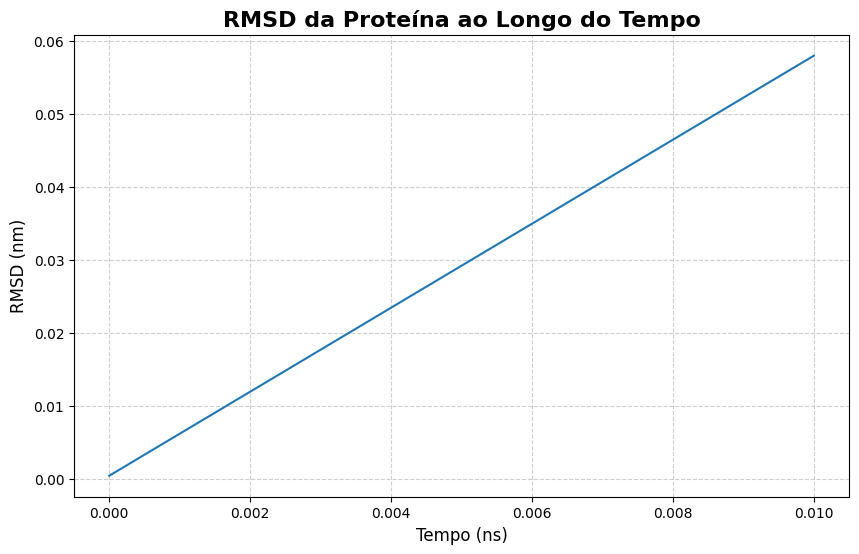

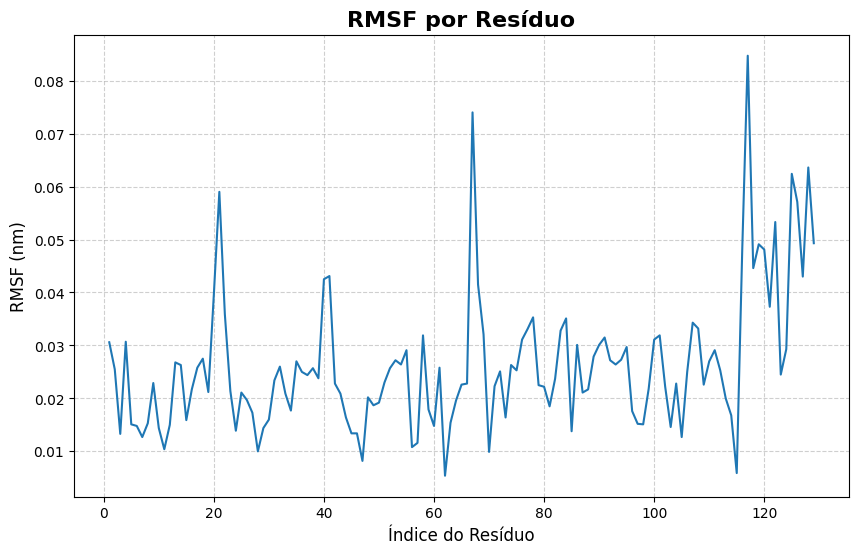

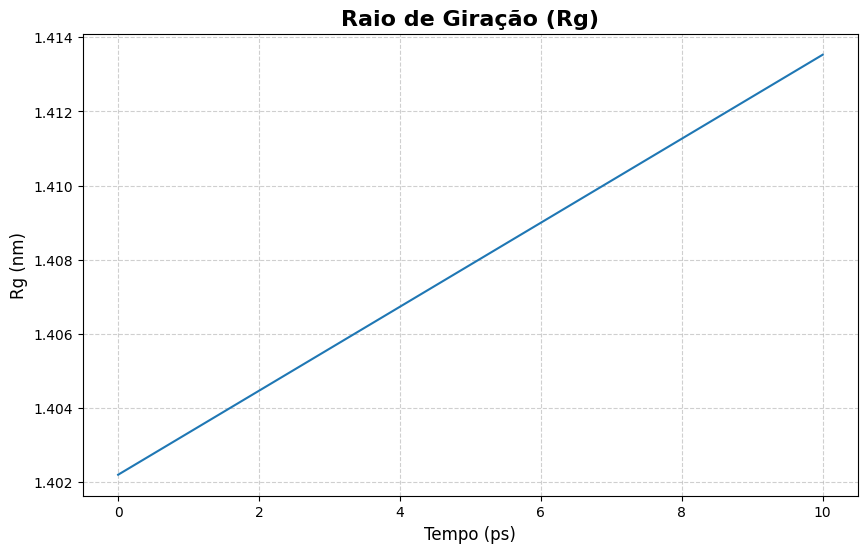

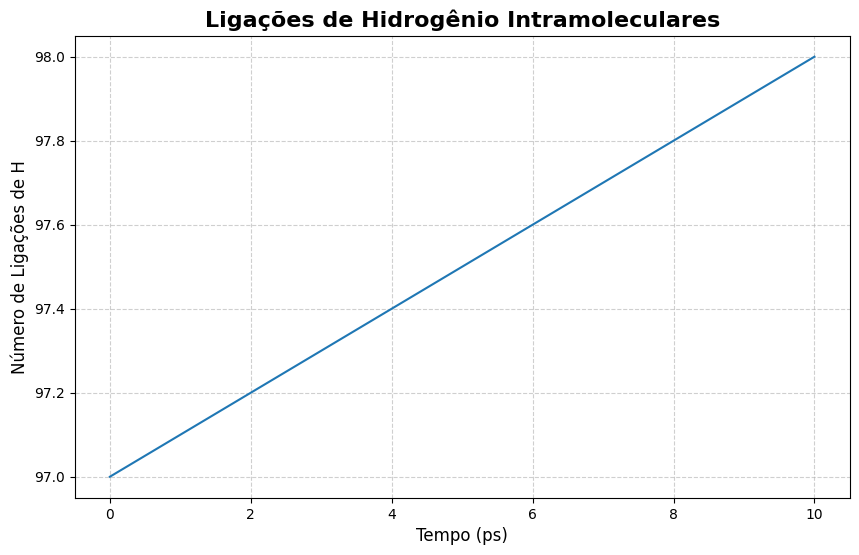

In [ ]:
# Célula Opcional: Visualização dos Resultados
# Use esta célula para plotar os resultados gerados na etapa anterior.

import pandas as pd
import matplotlib.pyplot as plt
import io

# Função aprimorada para plotar arquivos .xvg de forma robusta
def plot_xvg(file_path, title, xlabel, ylabel):
    """
    Lê um arquivo .xvg, ignora as linhas de cabeçalho ('@' e '#'),
    e plota as duas primeiras colunas de dados.
    """
    # Lista para armazenar as linhas de dados limpas
    cleaned_lines = []
    with open(file_path, 'r') as f:
        for line in f:
            # Mantém apenas as linhas que não são comentários/cabeçalho
            if not line.strip().startswith(('@', '#')):
                cleaned_lines.append(line)

    # Verifica se há dados para plotar após a limpeza
    if not cleaned_lines:
        print(f"Aviso: Nenhum dado encontrado em '{file_path}' após remover os cabeçalhos.")
        return

    # Usa io.StringIO para tratar a lista de linhas limpas como um arquivo
    data_io = io.StringIO(''.join(cleaned_lines))

    # Lê os dados com pandas a partir do "arquivo" em memória
    data = pd.read_csv(
        data_io,
        sep=r'\s+',              # Usa expressão regular para qualquer espaço em branco (substitui delim_whitespace)
        header=None,             # O arquivo não tem linha de cabeçalho
        usecols=[0, 1],          # Usa apenas as duas primeiras colunas (ex: tempo e valor)
        names=['x', 'y']         # Nomeia as colunas
    )

    # Gera o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(data['x'], data['y'])
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plotar os gráficos com a função corrigida
# Esta seção permanece a mesma
plot_xvg('rmsd.xvg', 'RMSD da Proteína ao Longo do Tempo', 'Tempo (ns)', 'RMSD (nm)')
plot_xvg('rmsf.xvg', 'RMSF por Resíduo', 'Índice do Resíduo', 'RMSF (nm)')
plot_xvg('giracao.xvg', 'Raio de Giração (Rg)', 'Tempo (ps)', 'Rg (nm)')
plot_xvg('hbond_intra.xvg', 'Ligações de Hidrogênio Intramoleculares', 'Tempo (ps)', 'Número de Ligações de H')